In [2]:
!pip install labelme opencv-python matplotlib albumentations

^C


  Using cached labelme-5.3.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached imgviz-1.7.4-py3-none-any.whl (7.7 MB)
  Using cached natsort-8.4.0-py3-none-any.whl (38 kB)
                                              0.0/7.2 MB ? eta -:--:--
                                              0.1/7.2 MB 4.2 MB/s eta 0:00:02
     ----                                     0.8/7.2 MB 9.9 MB/s eta 0:00:01
     -----------                              2.1/7.2 MB 19.1 MB/s eta 0:00:01
     --------------                           2.6/7.2 MB 16.8 MB/s eta 0:00:01
     -----------------------------            5.4/7.2 MB 24.5 MB/s eta 0:00:01
     --------------------------------------   6.9/7.2 MB 25.8 MB/s eta 0:00:01
     ---------------------------------------- 7.2/7.2 MB 24.1 MB/s eta 0:00:00
  Using c

In [1]:
import os
import time
import uuid
#uuid uniform uniqe identifier creator for diff files and images(custom name maker basically)
import cv2
#opencv allows us to use our camera and stuff

In [ ]:
-m pip install --upgrade pip

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2

In [18]:
import os
import time
import uuid
#uuid uniform uniqe identifier creator for diff files and images(custom name maker basically)
import cv2
#opencv allows us to use our camera and stuff


In [7]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [8]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
matplotlib


Using matplotlib backend: <object object at 0x000001E0E38BFA90>


In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [1]:
import tensorflow as tf


In [16]:
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
images = tf.data.Dataset.list_files('Data\\Images\\*.jpg',shuffle=False)

In [5]:
images.as_numpy_iterator().next()

b'Data\\Images\\c774514f-787d-11ee-ae54-04ecd833fab7.jpg'

In [4]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [7]:

images = images.map(load_image)


In [8]:
images.as_numpy_iterator().next()

array([[[186, 187, 189],
        [176, 177, 179],
        [173, 172, 177],
        ...,
        [116,  99, 107],
        [123, 102, 111],
        [123, 100, 110]],

       [[182, 183, 185],
        [174, 175, 177],
        [171, 171, 173],
        ...,
        [115, 100, 103],
        [121, 102, 106],
        [121, 100, 105]],

       [[175, 179, 178],
        [171, 173, 172],
        [161, 161, 161],
        ...,
        [111, 102,  97],
        [114, 103,  99],
        [115, 101,  98]],

       ...,

       [[ 96,  72,  60],
        [ 96,  73,  59],
        [100,  74,  57],
        ...,
        [116, 120, 129],
        [119, 123, 132],
        [120, 125, 131]],

       [[100,  70,  62],
        [ 99,  69,  59],
        [101,  72,  58],
        ...,
        [111, 118, 128],
        [111, 118, 128],
        [113, 120, 128]],

       [[102,  69,  64],
        [101,  68,  61],
        [102,  70,  59],
        ...,
        [113, 121, 132],
        [112, 119, 129],
        [114, 121, 131]]

In [9]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [10]:
image_generator = images.batch(4).as_numpy_iterator()

In [30]:
plot_images = image_generator.next()

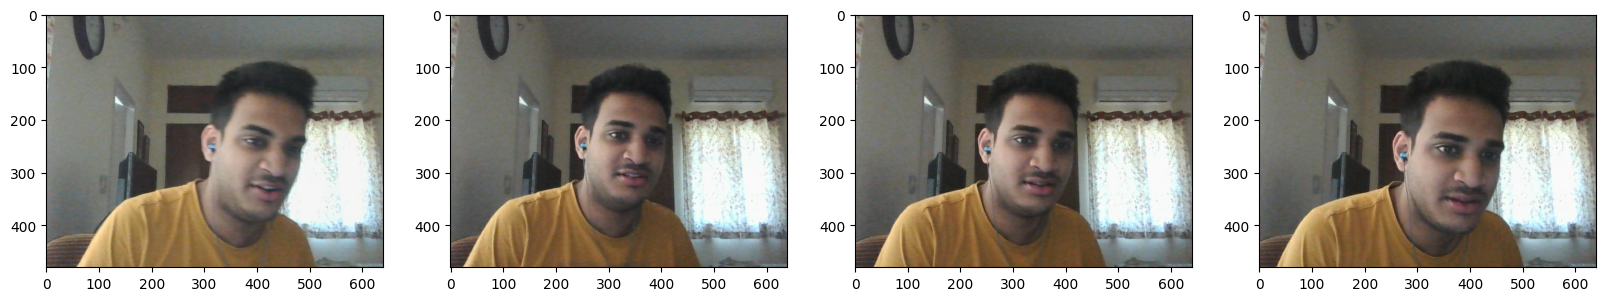

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [26]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

In [3]:
!pip install albumentations

In [9]:
import albumentations as alb

In [19]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [7]:
img = cv2.imread(os.path.join('data','train', 'images','cc6418dc-787d-11ee-b7af-04ecd833fab7.jpg'))

In [10]:
with open(os.path.join('data', 'train', 'labels', 'cc6418dc-787d-11ee-b7af-04ecd833fab7.json'), 'r') as f:
    label = json.load(f)

In [11]:
label

{'version': '5.2.1',
 'flags': {},
 'shapes': [{'label': 'Face',
   'points': [[285.7894736842105, 79.47368421052633],
    [539.7368421052631, 409.73684210526324]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\Images\\cc6418dc-787d-11ee-b7af-04ecd833fab7.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRo

In [12]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [13]:
coords

[285.7894736842105, 79.47368421052633, 539.7368421052631, 409.73684210526324]

In [14]:
coords = list(np.divide(coords, [640,480,640,480]))

In [15]:
coords

[0.4465460526315789,
 0.1655701754385965,
 0.8433388157894737,
 0.8536184210526317]

In [20]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [29]:
augmented['bboxes']

[(0.5950877192982456, 0.16994152046783628, 1.0, 0.9038596491228071)]

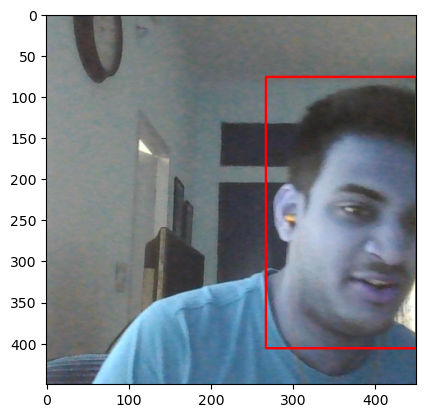

In [30]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [31]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [32]:
!pip install tensorflow

                                              0.0/284.2 MB ? eta -:--:--
                                              0.1/284.2 MB 4.3 MB/s eta 0:01:07
                                             1.0/284.2 MB 12.5 MB/s eta 0:00:23
                                             1.6/284.2 MB 13.0 MB/s eta 0:00:22
                                             2.5/284.2 MB 14.6 MB/s eta 0:00:20
                                             3.8/284.2 MB 17.3 MB/s eta 0:00:17
                                             5.1/284.2 MB 19.1 MB/s eta 0:00:15
                                             6.9/284.2 MB 22.1 MB/s eta 0:00:13
     -                                       8.2/284.2 MB 23.9 MB/s eta 0:00:12
     -                                      10.0/284.2 MB 24.6 MB/s eta 0:00:12
     -                                      11.5/284.2 MB 28.5 MB/s eta 0:00:10
     -                                      12.8/284.2 MB 31.2 MB/s eta 0:00:09
     -                                      14.

In [9]:
import tensorflow as tf

In [5]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [6]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [7]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [9]:
train_images.as_numpy_iterator().next()

b'aug_data\\train\\images\\cc164c78-787d-11ee-9f9a-04ecd833fab7.0.jpg'

In [8]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [9]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [10]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [11]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [50]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(900, 900, 480, 480, 420, 420)

In [12]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [13]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [14]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


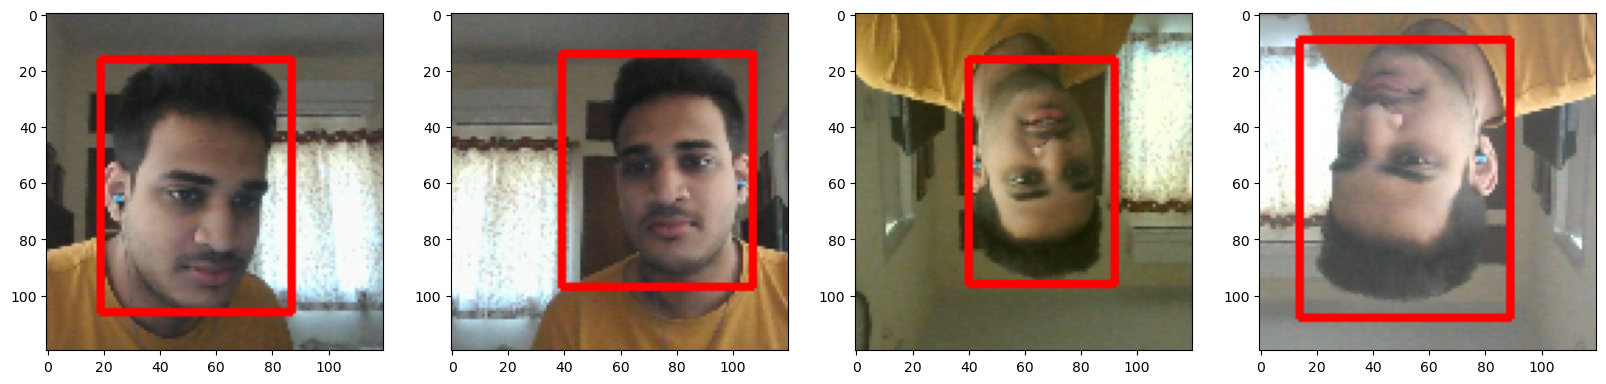

In [21]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [23]:
vgg = VGG16(include_top=False)

In [5]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [25]:
facetracker = build_model()

In [26]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [27]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [13]:
print(len(train))

113


In [28]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [29]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [30]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [31]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [32]:
model = FaceTracker(facetracker)

In [33]:
model.compile(opt, classloss, regressloss)

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
113/113 [==============================] - 76s 654ms/step - total_loss: 0.3645 - class_loss: 0.0192 - regress_loss: 0.3549 - val_total_loss: 0.0738 - val_class_loss: 3.4900e-04 - val_regress_loss: 0.0736
Epoch 2/10
113/113 [==============================] - 73s 642ms/step - total_loss: 0.0786 - class_loss: 1.5139e-04 - regress_loss: 0.0785 - val_total_loss: 0.0373 - val_class_loss: 9.6343e-05 - val_regress_loss: 0.0373
Epoch 3/10
113/113 [==============================] - 73s 640ms/step - total_loss: 0.0428 - class_loss: 5.9913e-05 - regress_loss: 0.0428 - val_total_loss: 0.0238 - val_class_loss: 3.3588e-05 - val_regress_loss: 0.0238
Epoch 4/10
113/113 [==============================] - 77s 676ms/step - total_loss: 0.0278 - class_loss: 2.5872e-05 - regress_loss: 0.0278 - val_total_loss: 0.0299 - val_class_loss: 5.6359e-05 - val_regress_loss: 0.0299
Epoch 5/10
113/113 [==============================] - 74s 649ms/step - total_loss: 0.0227 - class_loss: 1.4484e-05 - regress_los

In [37]:
hist.history

{'total_loss': [0.06108841672539711,
  0.020516566932201385,
  0.036673467606306076,
  0.006275597959756851,
  0.011204399168491364,
  0.009234601631760597,
  0.00929020345211029,
  0.009076355025172234,
  0.008087501861155033,
  0.004876607097685337],
 'class_loss': [0.00024294191098306328,
  2.995246359205339e-05,
  1.6883204807527363e-05,
  1.2323376722633839e-05,
  4.05314040108351e-06,
  3.159055268042721e-06,
  4.768373855768004e-07,
  1.9073520434176316e-06,
  5.513480573426932e-06,
  1.1533677024999633e-05],
 'regress_loss': [0.06096694618463516,
  0.02050159126520157,
  0.03666502609848976,
  0.006269436329603195,
  0.011202372610569,
  0.00923302210867405,
  0.009289965033531189,
  0.009075401350855827,
  0.008084745146334171,
  0.004870840348303318],
 'val_total_loss': [0.07375741750001907,
  0.03731236234307289,
  0.023782622069120407,
  0.02991548366844654,
  0.03741714358329773,
  0.015061129815876484,
  0.022414542734622955,
  0.027516361325979233,
  0.026516370475292206

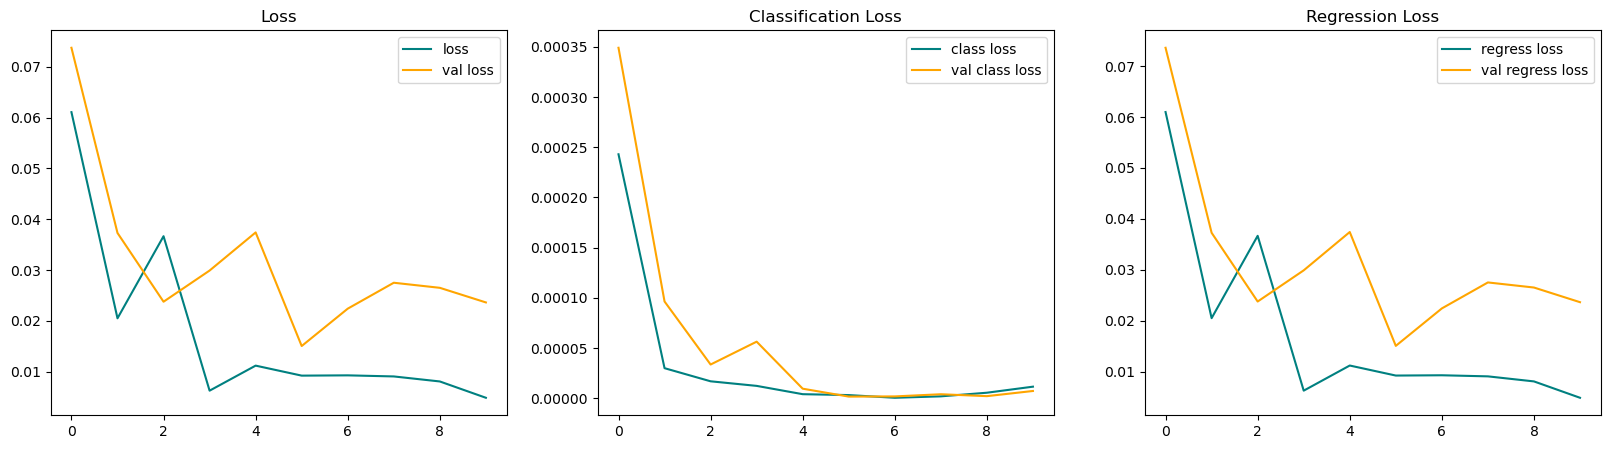

In [38]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [60]:
test_data = test.as_numpy_iterator()

In [61]:
test_sample = test_data.next()

In [62]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 140ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


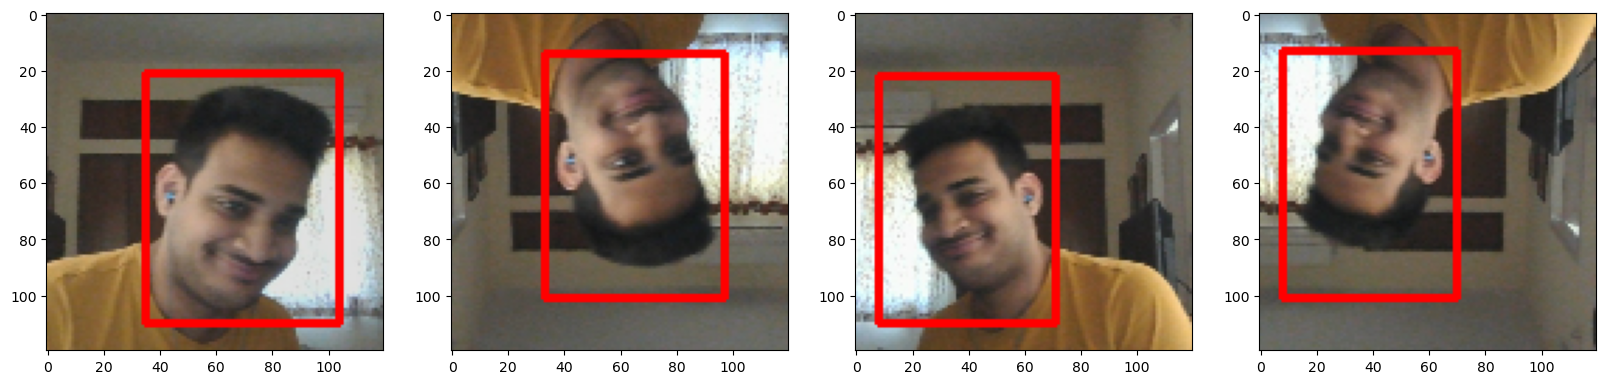

In [63]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [64]:
from tensorflow.keras.models import load_model

In [65]:
facetracker.save('facetracker.h5')

c:\Users\rohit\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
facetracker = load_model('facetracker.h5')